In [22]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ROOT_DIR = Path().cwd().parent
data_dir = ROOT_DIR.joinpath('data', 'toy')

In [4]:
path = ROOT_DIR.joinpath('outputs', 'toy', 'first', 'result.csv')
df = pd.read_csv(path)
df.head()

,授業コード,講義名,対象コース,種別,担当教員,教室,時限,コマ数,推定受講人数
0,161,lecture_0161,"P,AS,F",選択,"矢吹,水瀬,星井",A号館_001,土1,1,50
1,343,lecture_0343,AS,選択,高槻,A号館_006,月1,1,70
2,423,lecture_0423,F,選択,"星井,横山,春日",A号館_006,月2,1,70
3,248,lecture_0248,"A,AS",選択,"田中,高山,北沢,佐竹",A号館_006,月5,1,70
4,496,lecture_0496,F,選択,菊池,A号館_006,火3,1,70


In [5]:
# 各集合の作成
courses = set(sum([cs.strip().split(',') for cs in df['対象コース'].to_list()], []))
categories = set(df['種別'].to_list())
teachers = set(sum([ts.strip().split(',') for ts in df['担当教員'].to_list()], []))
rooms = pd.read_csv(data_dir.joinpath('rooms.csv'))['教室'].to_list()
periods = pd.read_csv(data_dir.joinpath('periods.csv'), header=None).iloc[0].to_list()

### 教員/教室の被りチェック

In [6]:
check_lists = [teachers, rooms]
cols = ['担当教員', '教室']
for col, keys in zip(cols, check_lists):
    for key in keys:
        df_sub = df[df[col].str.contains(key)]
        is_duplicated = bool(df_sub.duplicated(subset='時限').sum())
        if is_duplicated:
            print(f'{key} is duplicated!')
        else:
            pass

### 割合確認

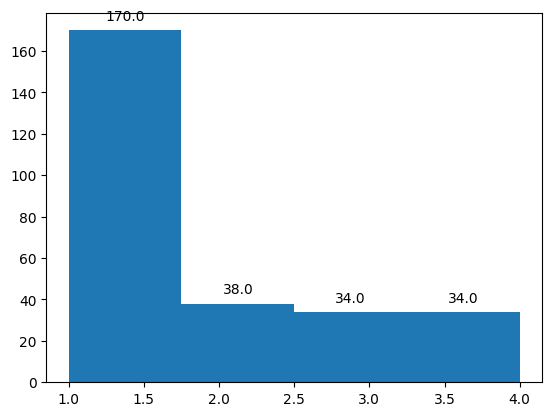

In [34]:
# コース数
data = df['対象コース'].map(lambda x: len(x.split(',')))
num_bins = len(set(data.to_list()))
hist, bins, _ = plt.hist(data, bins=num_bins)

for i in range(len(bins) - 1):
    bin_start = bins[i]
    bin_end = bins[i + 1]
    count = hist[i]
    
    # ビンの中心座標を計算
    bin_center = (bin_start + bin_end) / 2
    
    # 個数をヒストグラムの上に描画する
    plt.annotate(f'{count}', xy=(bin_center, count), xytext=(0, 5), textcoords='offset points',
                 ha='center', va='bottom')

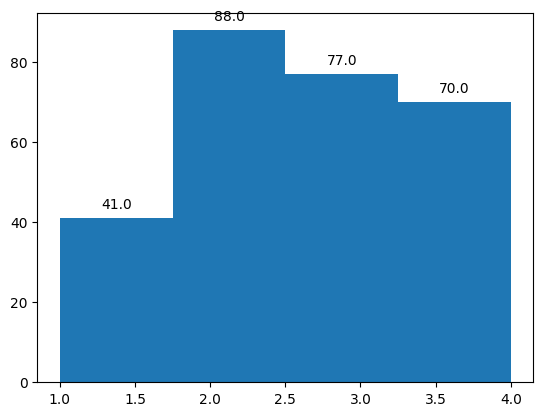

In [35]:
# 教員数
data = df['担当教員'].map(lambda x: len(x.split(',')))
num_bins = len(set(data.to_list()))
hist, bins, _ = plt.hist(data, bins=num_bins)

for i in range(len(bins) - 1):
    bin_start = bins[i]
    bin_end = bins[i + 1]
    count = hist[i]
    
    # ビンの中心座標を計算
    bin_center = (bin_start + bin_end) / 2
    
    # 個数をヒストグラムの上に描画する
    plt.annotate(f'{count}', xy=(bin_center, count), xytext=(0, 5), textcoords='offset points',
                 ha='center', va='bottom')

In [45]:
# 推定受講人数
data = df['推定受講人数']
data.value_counts()

推定受講人数
70     145
80      58
100     42
200     12
300      9
50       7
150      3
Name: count, dtype: int64